In [3]:
# if needed: pip install requests or conda install requests
import requests

requests.__path__


['/Users/srinivasaluri/anaconda/lib/python3.6/site-packages/requests']

In [4]:
#import required modules into the kernel
import pandas as pd
import csv
from collections import defaultdict
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
import seaborn as sns
import os
import ipywidgets as widgets

### Web scraping Selenium and beautifulsoup
Website is not allowing to scrape with beautiful soup, so started with selecnium and then useing beautiful soup.

In [85]:
#options = Options()
#options.add_argument('--headless')
#options.add_argument('--disable-gpu')
chromedriver = "/Applications/chromedriver"#"/usr/lib/chromium-browser/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

# Alternatives to Chrome: Firefox, PhantomJS

In [44]:
import re
#write a function to scrape and clean the text 
(perfume_descr.replace('\n\n\nPlay Video\n\n\n\n', ' ')
     .replace('\n\n\nRead More\n\n\n\n\n\n\n\nRead More\n\n\n\n\n\n\n', ' ')
     .replace('\n\n','').strip())

### Manually get all webpages  and get all links to the individual pages

In [9]:
list_url = ['https://www.fragrancex.com/products/_cid_cologne__category.html',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=2&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=3&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=4&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=5&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=6&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=7&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=8&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=9&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=10&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=11&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=12&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=13&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=14&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=15&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_cologne__category.html?currentPage=16&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=2&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=3&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=4&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=5&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=6&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=7&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=8&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=9&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=10&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=11&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=12&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=13&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=14&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage15&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=16&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=17&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=18&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=19&searchSortExpression=0',
           'https://www.fragrancex.com/products/_cid_perfume__category.html?currentPage=20&searchSortExpression=0']



In [6]:
#options = Options()
#options.add_argument('--headless')
#options.add_argument('--disable-gpu')
chromedriver = "/usr/lib/chromium-browser/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver # Alternatives to Chrome: Firefox, PhantomJS

### Get the links for text scraping

In [10]:
links = []

for url in list_url:
    try:
        page_url = url
        driver = webdriver.Chrome(chromedriver)
        driver.get(page_url)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        for line in soup.find_all('h2'):
            partial_link = line.find('a')['href']
            full_link = 'https://www.fragrancex.com' + partial_link
            links.append(full_link)
    except:
        continue

### save all the links as pickle file

In [24]:
import pickle
with open('links.pickle', 'wb') as file:
    pickle.dump(links, file)

### scraping data from 1440 webpages

In [13]:
#Fucnction to merge Review 
def get_review(review):
    return [rev.text for rev in review]

In [38]:
Name = []
Brand = []
Rating = []
Description = []
Review = []
driver = webdriver.Chrome(chromedriver) #using selenium and Beautifulsoup
for link in links:
    
    try:
        page_url = link
        
        driver.get(page_url)
        time.sleep(0.8)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        perfume_name = (soup.find_all('h1', {'class' : 'h2 product-header-name'})[0]
                        .text.strip().split('\n'))
        brand = perfume_name[1]
        perfume = perfume_name[0]
        perfume_descr = soup.find_all('p', {'class' : "mtn mq1-video-height "})[0].text
        rating = soup.find_all('div', {'class': 'pr-snippet-rating-decimal'})[0].text
        review = soup.find_all('p', {'class': 'pr-rd-description-text'})
        text = get_review(review)
        
        
        #append data to lists
        Rating.append(rating)
        Brand.append(brand)
        Name.append(perfume)
        Description.append(perfume_descr)
        Review.append(' '.join(text))
    
    except:
        pass


In [39]:
print(len(Name),
     len(Brand),
     len(Rating),
     len(Description),
     len(Review))

1394 1394 1394 1394 1394


### Data scraped made into a dataframe

In [40]:
df_dict = {'Name':Name,
          'Brand': Brand,
          'Rating': Rating,
          'Description':Description,
          'Review': Review}

In [41]:
perfume_with_review = pd.DataFrame(df_dict)
perfume_with_review.to_csv('perfumes_reviews.csv')

### Preprocessing text

Remove punctuations, Digits and Special characters

In [5]:
df1 = pd.read_csv('perfumes_reviews.csv')

Cleaning perfume description

In [6]:
#Function to clean text
import re
from string import digits
#write a function to clean the text 
def clean_description(text):
    '''
    Removes spaces, extra tails, special 
    characters, capitals and digits
    '''
    text = (text.replace('\n\n\nPlay Video\n\n\n\n', ' ')
                .replace('\n\n\nRead More\n\n\n\n\n\n\n\nRead More\n\n\n\n\n\n\n', ' ')
                .replace('\n\n','').strip())
    text = text.lower()
    remove_digits = str.maketrans('', '', digits)
    new_text = text.translate(remove_digits)
    new_text = re.sub(r'\W+', ' ', new_text)
    return (new_text)

df1['Desc_clean'] = df1['Description'].apply(clean_description)

Cleaning review

In [7]:
from string import digits
import re
import string

def clean_review(text):
    '''
    Function to remove digits and special characters from text
    
    '''
    text = re.sub("(\d*\.\d+)|(\d+\.[0-9 ]+)","",str(text))
    text = text.lower()
    remove_digits = str.maketrans('', '', digits)
    new_text = text.translate(remove_digits)
    new_text = re.sub(r'\W+', ' ', new_text)
    return new_text
  

df1['Rev_clean'] = df1['Review'].apply(clean_review)

In [9]:
df1.shape

(1394, 8)

Join perfume description and reviews into one document

In [10]:
df1['Desc_Rev'] = df1['Desc_clean']+ ' ' + df1['Rev_clean']

In [11]:
df2 = (df1.drop(['Unnamed: 0', 'Description', 'Review', 'Desc_clean', 'Rev_clean'], 
                axis = 1))
df2 = df2.drop_duplicates(subset=None, keep='first', inplace=False)

In [12]:
df2 = df2.reset_index(drop=True)

### Using TF-IDF on the text

In [13]:
df2.shape

(1324, 4)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

In [295]:
#Using TF-IDF on combined text - Perfume description + Reviews
tfidf = TfidfVectorizer(stop_words = 'english', max_df=0.5)
X = df2['Desc_Rev']
tf_X = tfidf.fit_transform(X)

In [296]:
tf_X.shape

(1324, 13110)

In [297]:
tfidf.get_feature_names()

['___',
 'aa',
 'aachen',
 'aall',
 'aapply',
 'abbreviated',
 'abc',
 'abercrombie',
 'abetter',
 'ability',
 'able',
 'abloom',
 'ablsolutely',
 'abonos',
 'aboout',
 'abound',
 'aboutit',
 'abrasive',
 'abroad',
 'abruptly',
 'abs',
 'absinth',
 'absinthe',
 'absolu',
 'absolue',
 'absolute',
 'absolutely',
 'absolutist',
 'absolutley',
 'absolutly',
 'absorbing',
 'abstract',
 'absynth',
 'abt',
 'abundance',
 'abundant',
 'ac',
 'acacia',
 'academic',
 'academy',
 'accademia',
 'accasion',
 'accent',
 'accented',
 'accenting',
 'accents',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessibility',
 'accessible',
 'accessing',
 'accessories',
 'accessorizing',
 'accessory',
 'accident',
 'accidentally',
 'accidently',
 'acclaim',
 'acclaimed',
 'accolades',
 'accommodate',
 'accommodating',
 'accompanied',
 'accompanies',
 'accompaniment',
 'accompany',
 'accompanying',
 'accomplished',
 'accomplishments',
 'ac

### Using NMF for dimensionality reduction 

In [422]:
from sklearn.decomposition import NMF
nmf = NMF(n_components = 15, init = 'random')
W = nmf.fit_transform(tf_X)
H = nmf.components_

In [423]:
print(W.shape, H.shape)

(1324, 15) (15, 13110)


In [424]:
W

array([[0.00033223, 0.11848804, 0.05292962, ..., 0.        , 0.00256901,
        0.00753817],
       [0.01700866, 0.11521642, 0.04581298, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00289935, 0.08357435, ..., 0.01166654, 0.00242111,
        0.        ],
       ...,
       [0.02269465, 0.01057042, 0.01231006, ..., 0.        , 0.00021728,
        0.00511207],
       [0.        , 0.00123039, 0.00599257, ..., 0.00144863, 0.00066159,
        0.03815936],
       [0.01769617, 0.00422608, 0.00275902, ..., 0.        , 0.00293365,
        0.01923368]])

In [425]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_1","component_2","component_3", "component_4", "component_5",
                     "component_6","component_7","component_8", "component_9", "component_10",
                     "component_11","component_12","component_13", "component_14", "component_15"],
             columns = tfidf.get_feature_names())
topic_word

,___,aa,aachen,aall,aapply,abbreviated,abc,abercrombie,abetter,ability,...,zipping,zirh,zoebelein,zone,zurich,éclat,élégant,ريحه,مميزه,وثبات
component_1,0.000,0.000,0.000,0.004,0.000,0.000,0.002,0.000,0.005,0.004,...,0.000,0.000,0.000,0.004,0.004,0.001,0.006,0.000,0.000,0.000
component_2,0.014,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_3,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.009,...,0.006,0.002,0.000,0.002,0.002,0.003,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.000,0.000,0.000,0.023,0.000,0.000,0.000,0.000,0.022,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.003,0.003
component_6,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_7,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.031,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_10,0.000,0.002,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.007,...,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000


In [426]:
pd.Series(W.argmax(axis=1)).value_counts()

2     384
0     341
14    194
1      56
11     52
12     51
9      49
13     34
4      32
6      31
8      29
3      28
10     19
7      13
5      11
dtype: int64

In [427]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [428]:
topics = display_topics(nmf, tfidf.get_feature_names(), 50)


Topic  0
years, compliments, bottle, used, just, ylang, elizabeth, body, clean, price, fragrancex, lily, smells, rose, daily, favorite, happy, wearing, perfumes, buy, bought, using, white, jasmine, order, everyday, arden, spray, signature, ve, vanilla, valley, people, sandalwood, beautiful, light, lauder, stores, amber, purchase, sweet, launched, overpowering, lasting, loved, woman, scents, ago, doesn, feminine

Topic  1
klein, calvin, ck, eternity, obsession, euphoria, jeans, underwear, fashion, american, designer, summer, launched, green, cologne, middle, clean, popular, coty, shock, line, unisex, compliments, white, late, accords, lines, escape, minimalist, crisp, famous, new, overpowering, truth, vetiver, aromatic, contradiction, licensing, basis, work, sexy, light, price, ozonic, daily, air, classic, spicy, peony, nice

Topic  2
cologne, men, lacoste, masculine, man, spicy, lavender, azzaro, woody, leather, aromatic, husband, smells, nice, clean, citrus, vetiver, dunhill, lemon, 

In [431]:
nmf.components_[1]

array([1.42872241e-02, 0.00000000e+00, 6.90879345e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [481]:
topic0 = np.sort(nmf.components_[0])[-50:]
words = tfidf.get_feature_names()
topwords = [words[i] for i in nmf.components_[0].argsort()[-50:]]
Topic0 = pd.DataFrame(list(zip(topwords,topic0)), columns = ['words', 'weight'])
Topic0 = Topic0.sort_values(['weight'],ascending = False)
Topic0["percent_weight"] = Topic0["weight"] * 100

In [480]:
topic1 = np.sort(nmf.components_[1])[-50:]
words = tfidf.get_feature_names()
topwords = [words[i] for i in nmf.components_[1].argsort()[-50:]]
Topic1 = (pd.DataFrame(list(zip(topwords,topic1)), columns = ['words', 'weight'])
         .sort_values(['weight'],ascending = False))
Topic1.dtypes


words      object
weight    float64
dtype: object

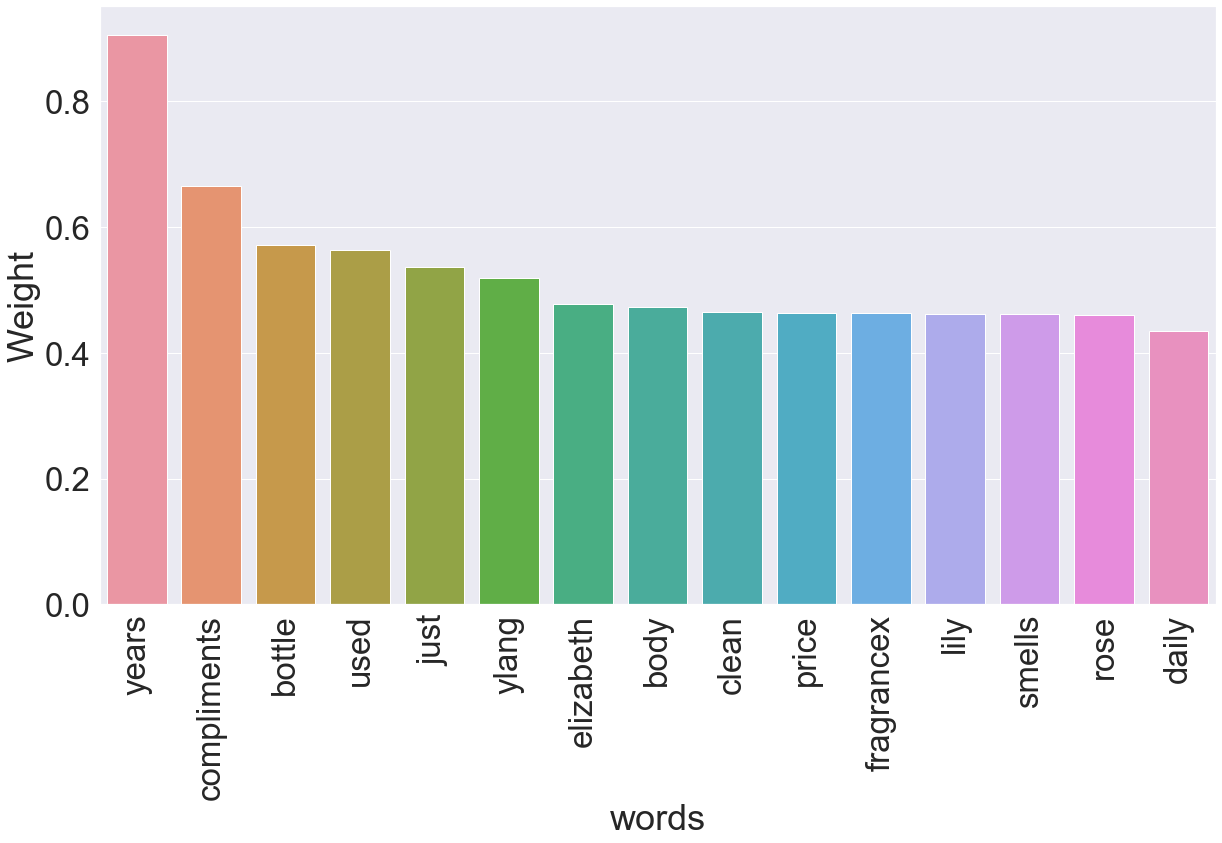

In [573]:
#Plotting top words by weights in Topic0
data = Topic0[0:15]
plt.figure(figsize=(20,11))
sns.set(font_scale=3)
ax = sns.barplot(data= data, x= "words", y = "weight", label = "big")
ax.set(ylabel = 'Weight', label = 30)
#ax.set_title("Word frequency",fontsize=40)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = ax.get_figure()
fig.savefig('Topic0_words.png')

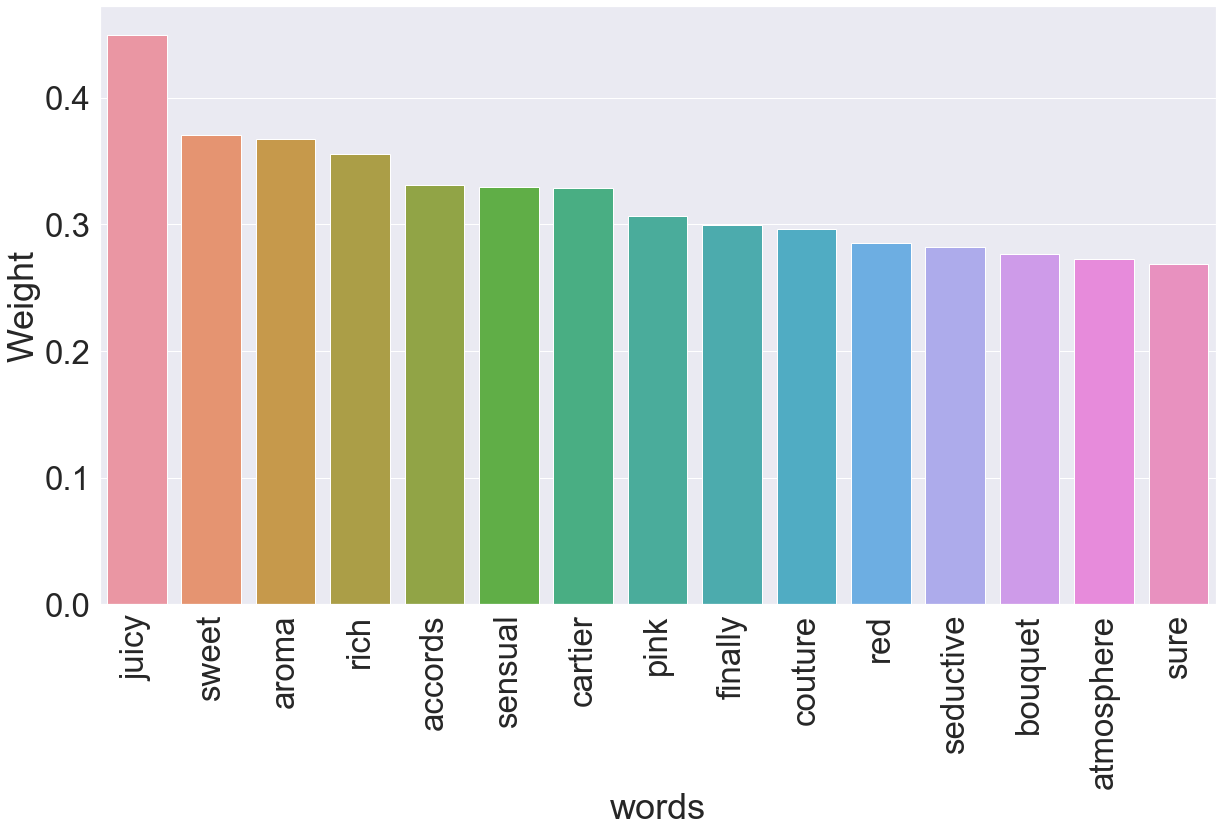

In [570]:
#Plotting top words by weights in Topic14 
topic14= np.sort(nmf.components_[14])[-50:]
words = tfidf.get_feature_names()
topwords = [words[i] for i in nmf.components_[14].argsort()[-50:]]
Topic15 = pd.DataFrame(list(zip(topwords,topic14)), columns = ['words', 'weight'])
Topic15 = Topic15.sort_values(['weight'],ascending = False)
data = Topic15[0:15]
plt.figure(figsize=(20,11))
sns.set(font_scale=3)
ax = sns.barplot(data= data, x= "words", y = "weight", label = "big")
ax.set(ylabel = 'Weight', label = 30)
#ax.set_title("Word",fontsize=40)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig = ax.get_figure()
fig.savefig('Topic1_words.png')

### Calculate distance metrics for given string 

In [304]:
s = ['perfume for evenings']

In [305]:
from sklearn.metrics import pairwise_distances
s = tfidf.transform(s)
s = nmf.transform(s)

In [307]:
pairwise_distances(W,s,metric='cosine').argmin(axis=0)

array([1015])

In [308]:
pairwise_distances(W,s,metric='cosine').argsort(axis=0)[:10]

array([[1015],
       [ 862],
       [ 597],
       [1197],
       [ 766],
       [ 488],
       [ 729],
       [1267],
       [ 418],
       [  61]])

### Function to return perfume details by giving index as input

In [327]:
def get_perfume_details(index):
    '''
    Return perfume details by giving 
    dataframe index number
    
    '''
    details = df2.iloc[index]
    return (details.Name,  details.Brand,  details.Rating)
        
    
get_perfume_details(888)   

('Nina Perfume ', 'By Nina Ricci for Women', 4.6)

In [328]:
#function to get list of perfumes by giving list index
def get_perfume_list(index):
    '''
    Return list perfume details by giving 
    list of index numbers
    
    '''
    details = []
    for i in index:
        details.append(get_perfume_details(i))
    return details
    
get_perfume_list([1245,1246])    

[('Extravagance Perfume ', 'By Givenchy for Women', 4.8),
 ('Escada Sentiment Perfume ', 'By Escada for Women', 4.5)]

In [1]:
# function to get perfumes by pair_wise distance from user input

def get_perfumes(ask):
    '''
    function that takes user input,
    measures pairwise distance(cosine) and
    returns 10 relavant perfumes
    
    '''
    #ask = input('what perfume you are looking for?')
    s = tfidf.transform([ask])
    s = nmf.transform(s)
    ind = pairwise_distances(W,s,metric='cosine').argsort(axis=0)[:10]
    list_perfumes = get_perfume_list(ind.reshape(len(ind),))
    return list_perfumes


### launch flask app

In [247]:
# To launch flask app HTML page needs to be launched first 
# For that HTML document is made and stored under templates folder 
#and HTML document within this folder
import html
from flask import render_template, request, Flask

In [544]:
# Initialize the flask app
app = Flask(__name__)
@app.route("/")
def perfume_page():
    with open("perfume.html", 'r') as perfume_file:
        return perfume_file.read()
    
@app.route("/perfume", methods=["POST", "GET"])
def perfume():
    a = request.args.get("txt","0")
    r = get_perfumes(a)
    return render_template('perfume.html', rec = r)

In [572]:
app.run(host='0.0.0.0', port=5000)


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Aug/2019 23:14:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Aug/2019 23:15:09] "GET /perfume?txt=perfume+for+sportswear HTTP/1.1" 200 -
127.0.0.1 - - [22/Aug/2019 23:15:21] "GET /perfume?txt=perfume+for+summer HTTP/1.1" 200 -
127.0.0.1 - - [22/Aug/2019 23:15:21] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Aug/2019 23:15:46] "GET /perfume?txt=perfume+for+cool+weather HTTP/1.1" 200 -
127.0.0.1 - - [22/Aug/2019 23:15:46] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Aug/2019 23:16:03] "GET /perfume?txt=perfume+for+datenight HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2019 10:01:49] "GET /perfume?txt=perfume+for+colddays HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2019 10:01:52] "GET /perfume?txt= HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2019 10:01:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Aug/2019 10:02:05] "GET /perfume?txt=perfume+for+summer HTTP/1.1" 200 -
127.0.0.1 - - [23/Aug/2019 10:05:11] "GET 